# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Import necessary Python Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

# DATA EXPLORATION

In [3]:
#loadindg the data set
df = pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')
#print first 5 rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Data Summary
df.shape

(1470, 35)

In [5]:
#find duplicates
df.duplicated().sum()

0

In [6]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

MaritalStatus               object
EducationField              object
Attrition                   object
JobRole                     object
Gender                      object
Over18                      object
OverTime                    object
Department                  object
BusinessTravel              object
YearsAtCompany               int64
WorkLifeBalance              int64
TrainingTimesLastYear        int64
YearsInCurrentRole           int64
StockOptionLevel             int64
StandardHours                int64
RelationshipSatisfaction     int64
YearsSinceLastPromotion      int64
PerformanceRating            int64
PercentSalaryHike            int64
TotalWorkingYears            int64
Age                          int64
NumCompaniesWorked           int64
MonthlyRate                  int64
MonthlyIncome                int64
JobSatisfaction              int64
JobLevel                     int64
JobInvolvement               int64
HourlyRate                   int64
EnvironmentSatisfact

In [8]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Age 

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
*******************************************************
*******************************************************
Value counts of Attrition 

No     1233
Yes     237
Name: Attrition, dtype: int64
*******************************************************
*******************************************************
Value counts of BusinessTravel 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*******************************************************
***

# OBSERVATIONS OF THE DATASET (FROM VALUE COUNTS)

1) OVER18

-Since all the employees are over the age of 18 years and that is proven by the value counts of each class in the column Over18, we will drop the column Over18 as well.

2) STANDARD HOURS

-1470 employees work 80 hours a week.

Since all the employees work same hours, we can drop this column.

3) EMPLOYEE NUMBER

Here, the EmployeeNumber would not contribute anything in the prediction since it is an ID, hence we shall drop it.

4) EMPLOYEE COUNT

1470 entries have a count of 1 since every employee's count is 1 and total count is 1470, we shall drop this column. As this has no importance to the prediction.

In [10]:
df=df.drop(columns = ['Over18', 'EmployeeNumber', 'StandardHours', 'EmployeeCount' ])

In [11]:
#Data Summary
df.shape

(1470, 31)

# ENCODING

In [12]:
# We will encode the object data type features into integer data types.

LABEL ENCODING for columns Department, EducationField, Attrition, JobRole, Gender, OverTime

ORDINAL ENCODING for columns BusinessTravel, MaritalStatus

In [14]:
#Import library:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Department','EducationField','Attrition','JobRole', 'Gender', 'OverTime']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [15]:
#ORDINAL ENCODER
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder(categories=[['Non-Travel','Travel_Rarely','Travel_Frequently'],['Single','Married','Divorced']])
df1=ord_enc.fit_transform(df[['BusinessTravel','MaritalStatus']])
df1

array([[1., 0.],
       [2., 1.],
       [1., 0.],
       ...,
       [1., 1.],
       [2., 1.],
       [1., 1.]])

In [16]:
df[['BusinessTravel','MaritalStatus']]=df1
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1.0,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2.0,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1.0,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2.0,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1.0,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [17]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Age 

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
*******************************************************
*******************************************************
Value counts of Attrition 

0    1233
1     237
Name: Attrition, dtype: int64
*******************************************************
*******************************************************
Value counts of BusinessTravel 

1.0    1043
2.0     277
0.0     150
Name: BusinessTravel, dtype: int64
*******************************************************
*************************************************

# OBSERVATION (POST ENCODING):

In [19]:
#checking the datatypes post encoding
df.dtypes

Age                           int64
Attrition                     int32
BusinessTravel              float64
DailyRate                     int64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

all the columns are now either int or float datatype

In [21]:
#encoding might have created a few duplicate columns
df.duplicated().sum()

0

There are no duplicate columns, lets check the null columns once again post encoding

In [23]:
df.isnull().sum().sum()

0

There are no null columns

In [24]:
#lets check the statistical description of the each column
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,0.902721,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,0.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,1.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# OBSERVATIONS OF DESCRIBE METHOD (ONLY CONTINOUS DATA)

1. Age : std<mean, min-max all quartiles are equally distributed 
2. DailyRate : std<mean; min-max all quartiles are equally distributed 
3. DistanceFromHome : std<mean; min-max all quartiles are equally distributed
4. HourlyRate : std<mean; min-max all quartiles are equally distributed
5. MonthlyIncome : std<mean; min-max all quartiles are equally distributed 
6. MonthlyRate : std<mean; min-max all quartiles are equally distributed 
7. TotalWorkingYears : std<mean; min-max all quartiles are equally distributed 
8. YearsInCurrentRole : std<mean; min-max all quartiles are equally distributed 
9. YearsSinceLastPromotion : std>mean; min-max all quartiles are not equally distributed. There seems to be skewness in data.
10. YearsAtCompany : std<mean; min-max all quartiles are not equally distributed. There seems to be skewness in data. 
11. PercentSalaryHike : std<mean; min-max all quartiles are equally distributed 
12. YearsWithCurrManager : std<mean; min-max all quartiles are equally distributed

0    1233
1     237
Name: Attrition, dtype: int64


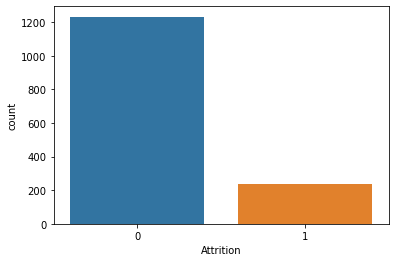

In [29]:
#count of each class (Attrition(1) = 237, NoAttrition(0)=1233)
ax=sns.countplot(x="Attrition", data=df)
print(df['Attrition'].value_counts())

- There is a problem of class imbalance here and hence we would have to either do upsampling or downsampling depending on the size of the dataset.

- Since the amount of upsampling needed would be around 70% we would be better doing downsampling to avoid any foreign data or unwanted data.

- We will peform downsampling at a later stage


# We have an imbalanced data set which we will downsample using SMOTE after the train_test_split

In [30]:
#Checking Correlation
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.011807,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.127006,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,-0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,-0.002640,-0.009696,-0.008670,-0.023489,-0.011310,-0.044896,-0.004164,0.029300,-0.011696,0.011831,0.008666,-0.030915,-0.013450,-0.008440,-0.030743,0.042752,-0.025727,0.001683,0.008926,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.010661,-0.056652,-0.015539,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.002640,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,-0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.008670,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,-0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,-0.023489,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,-0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,-0.011310,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.044896,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

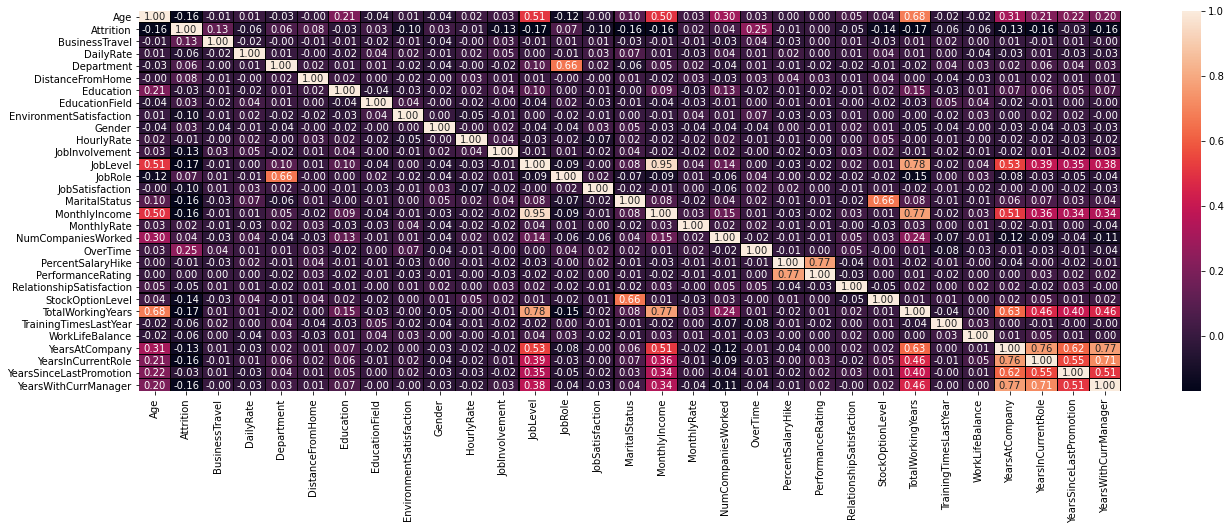

In [31]:
#Correlation using HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [32]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
TotalWorkingYears           0.171063
JobLevel                    0.169105
MaritalStatus               0.162070
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
BusinessTravel              0.127006
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
Gender                      0.029453
EducationField              0.026846
M

In [33]:
#As per the above details, there is no feature which has high correlation with the target column.
#But there is a problem of MULTICOLLINEARITY, as per the correlation heatmap

In [34]:
#let us check the relation of the highly correlated features with the target variable

# DIVIDE DATA INTO FEATURES & LABEL

In [36]:
#diving the dataset into feature and label
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# DATA VISUALIZATION

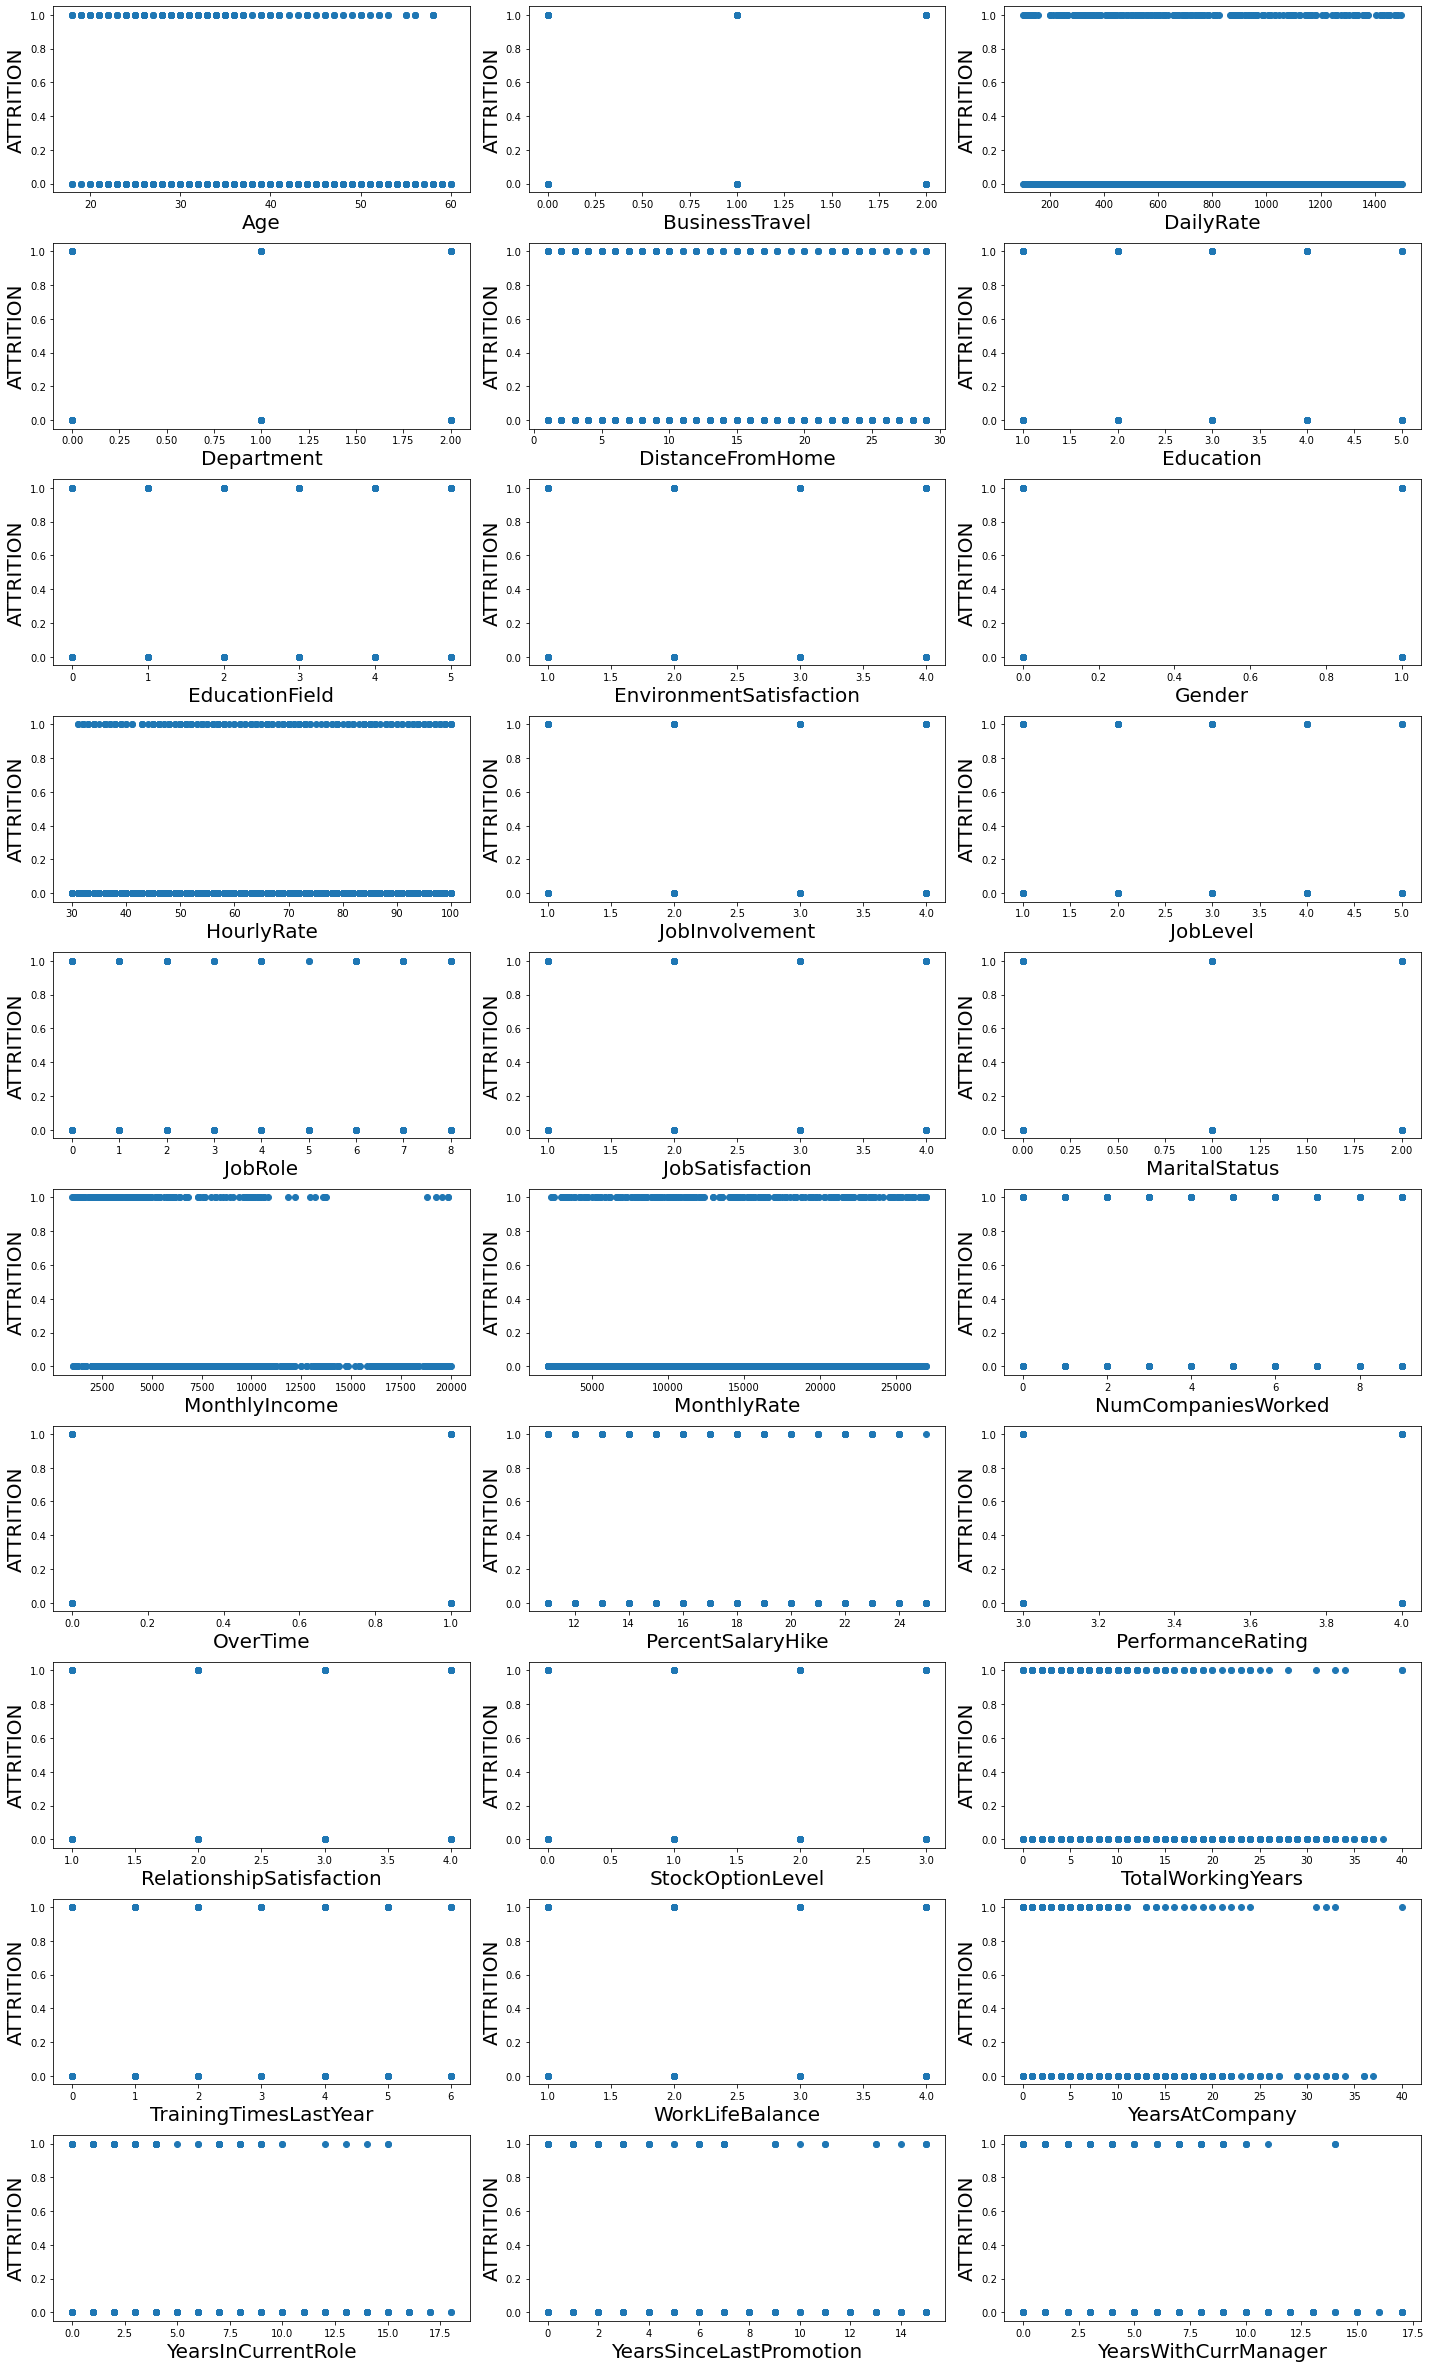

In [37]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=30: 
        ax=plt.subplot(10,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('ATTRITION', fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above observations and the scatter plot we are taking the following decisions with correlated columns:

1. Monthly Income and Joblevel (0.95)

Since monthly income is a continous data and Job level is an Ordinal data, Monthlyincome has a better relationship with target column

AND also the correlation for monthly income is lesser with the target variable as compared to job level feature. Hence, we will drop JobLevel.

2. Percent Salary hike and Performance Rating (0.77)

Since Percent Salary Hike is a continous data and PerformanceRating is an Ordinal data,

PercentSalaryHike has a better relationship with target column.

Hence, we will drop PerformanceRating.

3. Age and Total Working Years (0.68) && (4) Total Working Years and Monthly Income (0.77) (5) Job Level and Total Working Years (0.78)

Here, Age, MonthlyIncome and TotalWorkingYears all are continous data, Joblevel is an Ordinal Data.

Age & MonthlyIncome has a better relationship with target column AND also the correlation for Age, JobLevel & MonthlyIncome is lesser with the target variable as compared to TotalWorkingYears feature.

Hence, we will drop TotalWorkingYears.

6. Years in Current Role and Years with Current Manager (0.71) && (7) Years in Current Role and Years at Company (0.76) && (8) Years with Current Manager and Years at Company (0.77)

YearsInCurrentRole, YearswithCurrentManager and YearsatCompany are all continous data.

YearsatCompany has a strong relationship with the target variable, whereas YearsInCurrentRole and YearswithCurrentManager both have a similar realtionship.

And hence, we are dropping both YearsInCurrentRole and YearswithCurrentManager.



In [38]:
df = df.drop(columns=['JobLevel', 'PerformanceRating', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'])

In [39]:
df.shape

(1470, 26)

In [40]:
#diving the dataset into feature and label
X = df.drop(columns=['Attrition'])
y = df['Attrition']

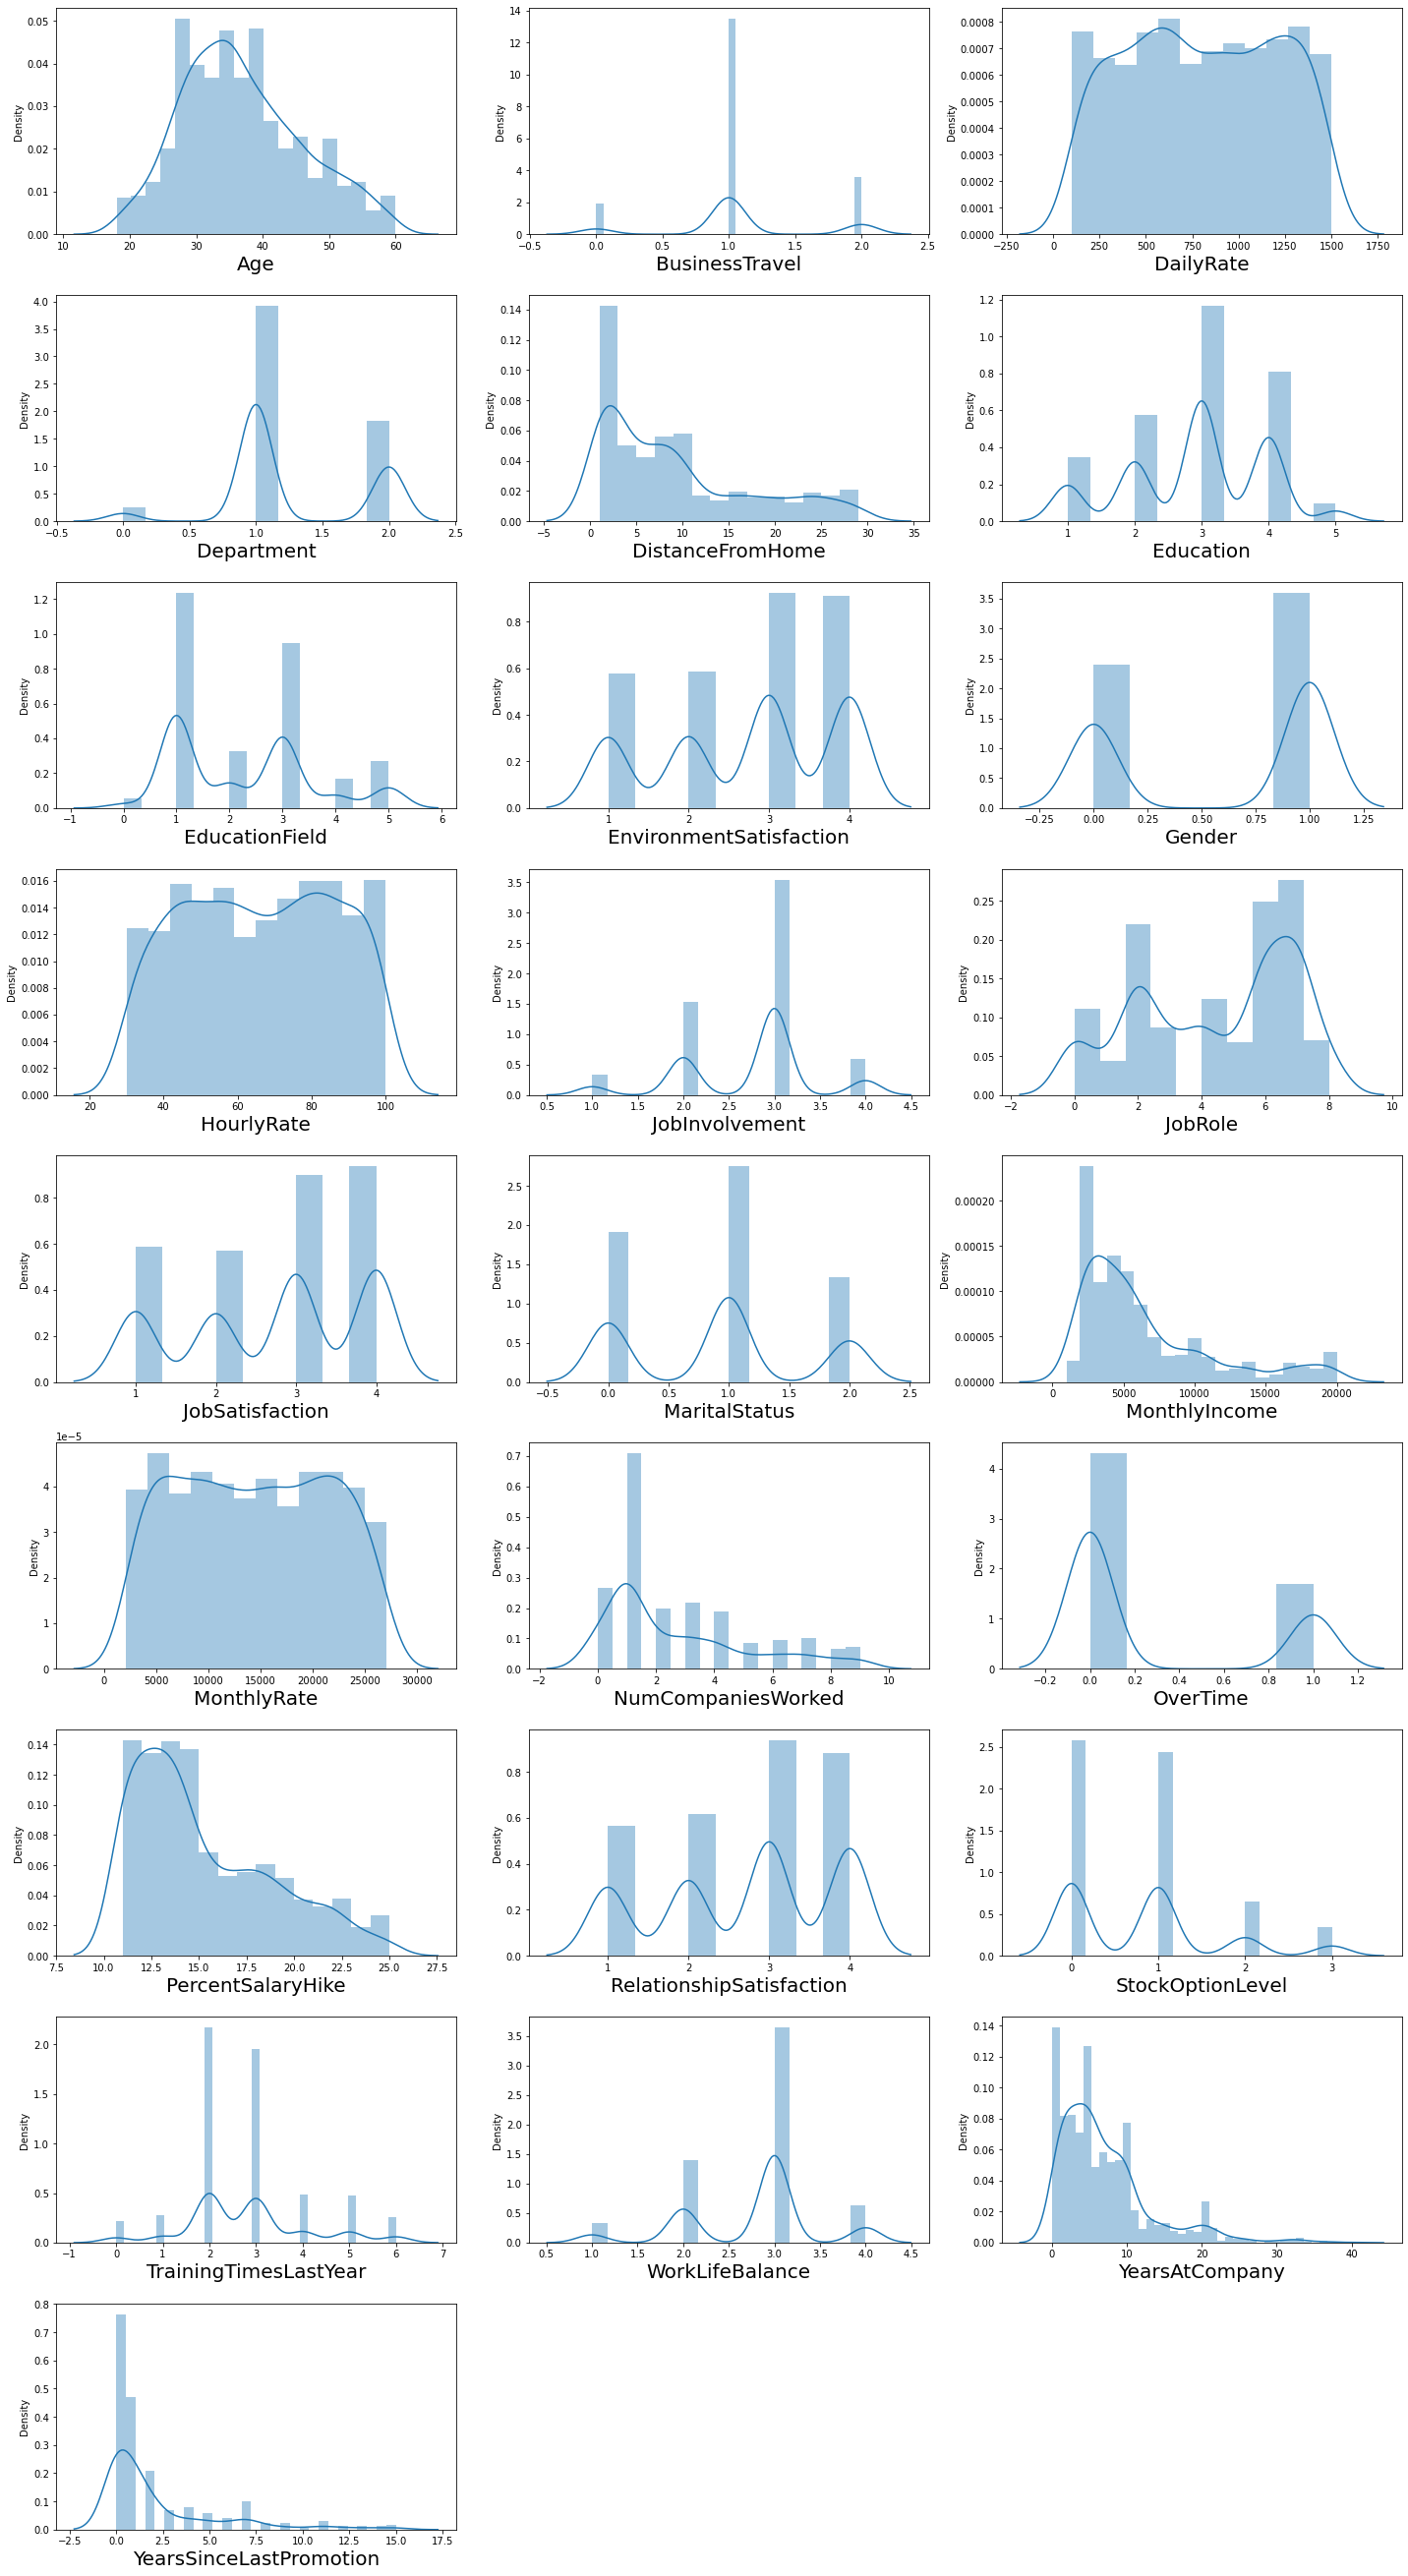

In [41]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [42]:
#Checking skewness of the features
X.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
YearsAtCompany              1.764529
MonthlyIncome               1.369817
NumCompaniesWorked          1.026471
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
Age                         0.413286
Department                  0.172231
MaritalStatus               0.152175
BusinessTravel              0.082428
MonthlyRate                 0.018578
DailyRate                  -0.003519
HourlyRate                 -0.032311
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobRole                    -0.357270
Gender                     -0.408665
JobInvolvement             -0.498419
WorkLifeBalance            -0.552480
dtype: float64

In [43]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
X_new = power_transform(X)
X=pd.DataFrame(X_new,columns=X.columns)
X.skew().sort_values(ascending=False) #validating that the skewness is removed

OverTime                    0.964489
YearsSinceLastPromotion     0.212129
PercentSalaryHike           0.116250
StockOptionLevel            0.087019
TrainingTimesLastYear       0.058058
BusinessTravel              0.039587
MonthlyIncome               0.032831
NumCompaniesWorked          0.014814
Department                  0.013801
DistanceFromHome           -0.007468
Age                        -0.007603
EducationField             -0.008386
YearsAtCompany             -0.008683
WorkLifeBalance            -0.012286
JobInvolvement             -0.020365
MaritalStatus              -0.088811
Education                  -0.099881
HourlyRate                 -0.106461
MonthlyRate                -0.184087
RelationshipSatisfaction   -0.193634
DailyRate                  -0.196160
EnvironmentSatisfaction    -0.205395
JobSatisfaction            -0.212815
JobRole                    -0.319659
Gender                     -0.408665
dtype: float64

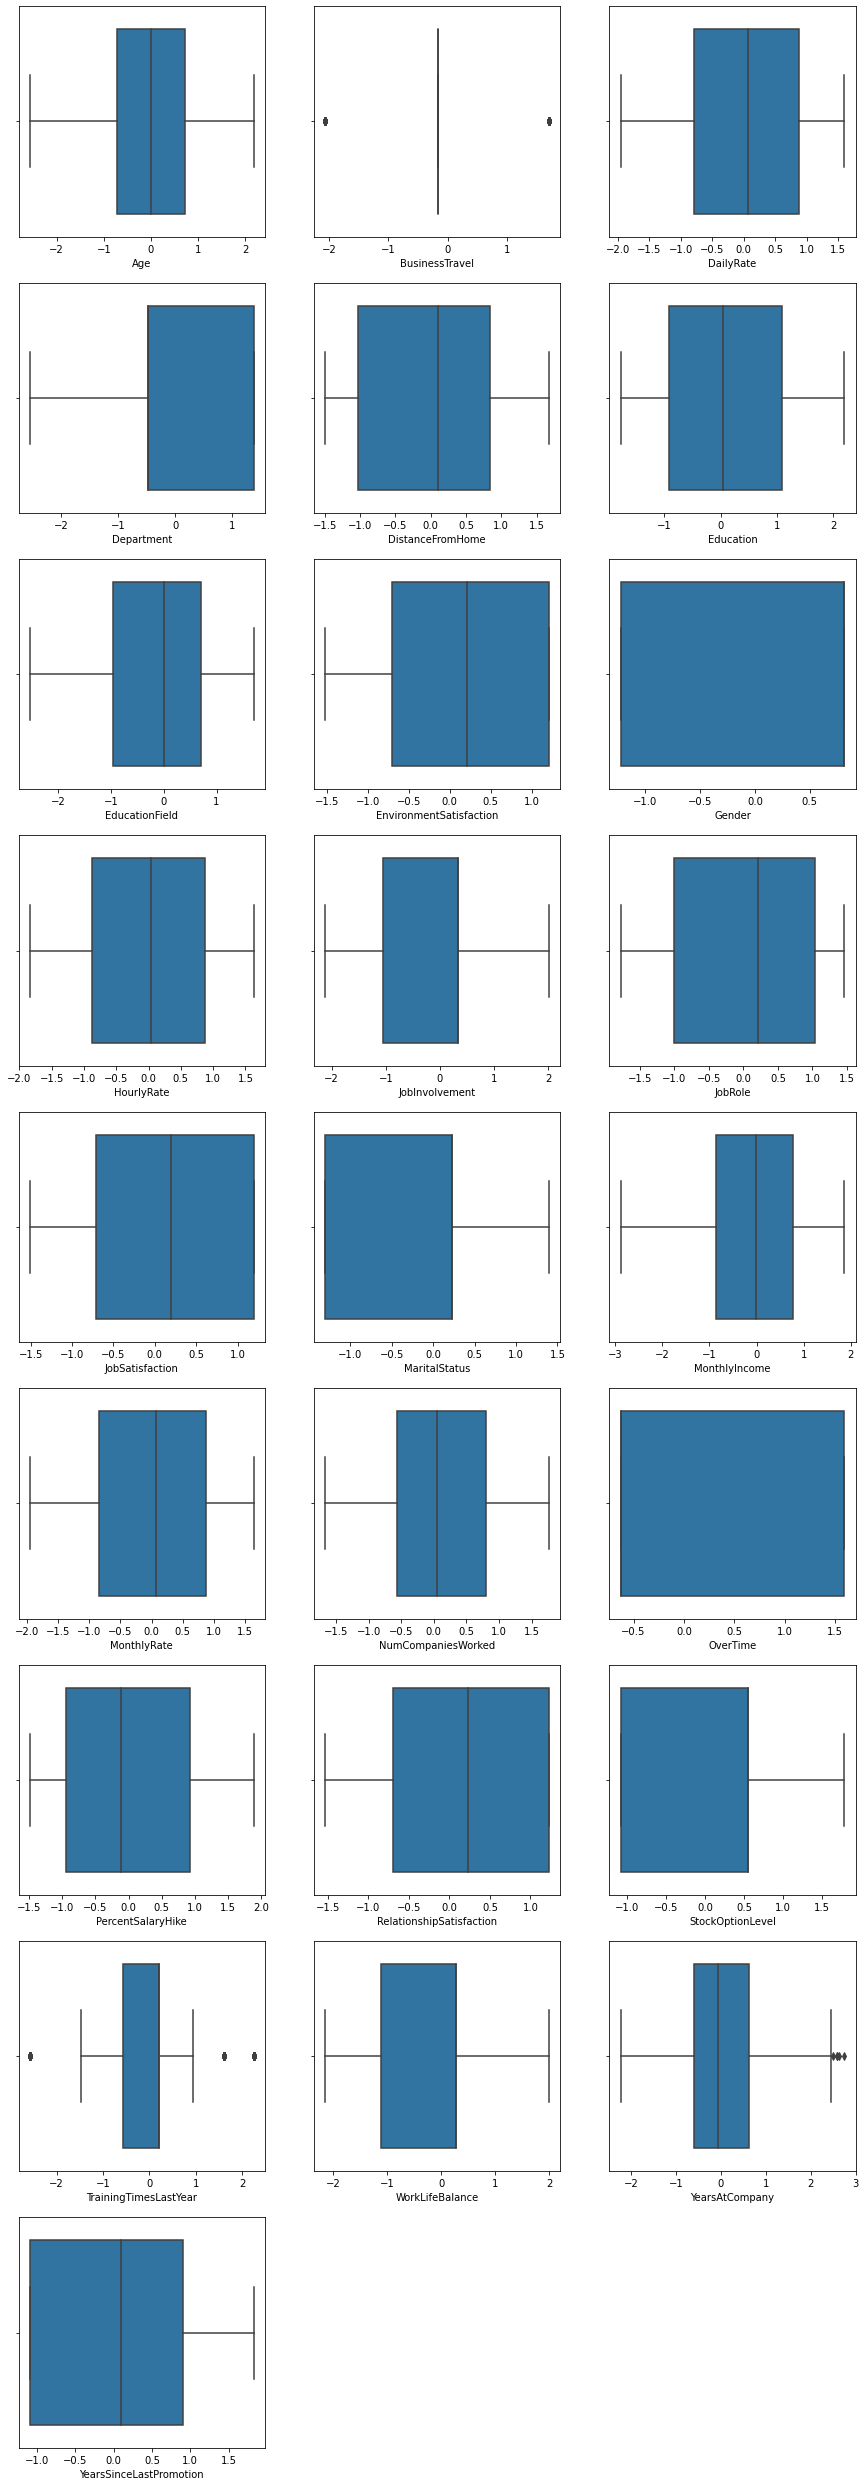

In [44]:
#Visualizing the outliers using BOXPLOT

plt.figure(figsize=(15,50))
graph=1

for column in X:
    if graph<=30: 
        ax=plt.subplot(10,3,graph)
        sns.boxplot(X[column],orient='v')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()

In [45]:
#Since we have already reduced the not important features, we would not require to do any further feature selections for now. 

In [46]:
#Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.9138321995464853 on Random State 123


In [48]:
#CREATING TRAIN-TEST SPLIT
x_train_imb, x_test, y_train_imb, y_test =  train_test_split(X_scaled, y, test_size=0.30, random_state=123)

In [49]:
print(x_train_imb.shape)
print(y_train_imb.shape)
print(x_test.shape)
print(y_test.shape)

(1029, 25)
(1029,)
(441, 25)
(441,)


# USING SMOTE FOR DOWN-SAMPLING

In [50]:
#conda install -c conda-forge imbalanced-learn

0    1233
1     237
Name: Attrition, dtype: int64


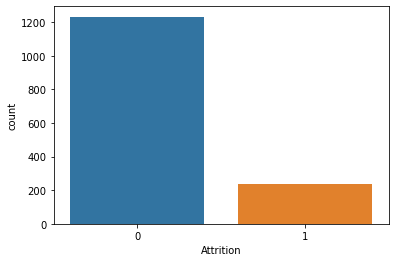

In [51]:
#count of each class (Attrition(1) = 237, NoAttrition(0)=1233)
ax=sns.countplot(x="Attrition", data=df)
print(df['Attrition'].value_counts())

In [52]:
# We will be doing down sampling of the target column which has imblanced class

In [53]:
#USING SMOTE FOR DOWN-SAMPLING

In [54]:
print(y_train_imb.value_counts())

0    849
1    180
Name: Attrition, dtype: int64


In [55]:
#y_train has 849 entries of class 0 and only 180 entries of class 1

In [56]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler()
down_smp=RandomUnderSampler(0.99)
x_train_ns,y_train_ns=down_smp.fit_sample(x_train_imb,y_train_imb)
from collections import Counter
print('The no of samples before fit()', format(Counter(y_train_imb)))
print('The no of samples after fit()', format(Counter(y_train_ns)))

The no of samples before fit() Counter({0: 849, 1: 180})
The no of samples after fit() Counter({0: 181, 1: 180})


In [57]:
print(y_train_ns.value_counts())

0    181
1    180
Name: Attrition, dtype: int64


In [59]:
#Now both the classes have 181 and 180 entries and hence we have a balanced class in our training data.

In [60]:
# Wrong way of assigning the variables. Instead use shallow copy or deep copy
x_train = x_train_ns
y_train = y_train_ns

In [61]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(361, 25)
(361,)
(441, 25)
(441,)


# APPLYING CLASSIFICATION MODELS & FINDING BEST FIT MODEL

In [62]:
# Original x_train and y_train are used in the modeling. Check the support, the frequency is as original.
# you need to use the downsampled data here.


#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 73.46938775510205
[[278 106]
 [ 11  46]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.83       384
           1       0.30      0.81      0.44        57

    accuracy                           0.73       441
   macro avg       0.63      0.77      0.63       441
weighted avg       0.88      0.73      0.78       441



In [63]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Accuracy 65.07936507936508
[[243 141]
 [ 13  44]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76       384
           1       0.24      0.77      0.36        57

    accuracy                           0.65       441
   macro avg       0.59      0.70      0.56       441
weighted avg       0.86      0.65      0.71       441



In [64]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_rf)*100)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy 75.51020408163265
[[290  94]
 [ 14  43]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.84       384
           1       0.31      0.75      0.44        57

    accuracy                           0.76       441
   macro avg       0.63      0.75      0.64       441
weighted avg       0.87      0.76      0.79       441



In [65]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_svc)*100)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy 78.2312925170068
[[297  87]
 [  9  48]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       384
           1       0.36      0.84      0.50        57

    accuracy                           0.78       441
   macro avg       0.66      0.81      0.68       441
weighted avg       0.89      0.78      0.81       441



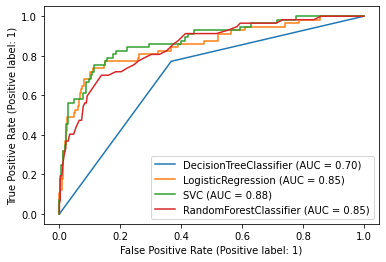

In [66]:
#PLOT THE ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.show()

In [67]:
#Logistic Regression, Random Forest and SVC are producing good accuracy. 
#Now we will check cross validation score as well for overfitting. 

In [68]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,X_scaled,y,cv=5)
print("Cross validation score of Logistic Regression Model", scr.mean())
scr2 = cross_val_score(rf,X_scaled,y,cv=5)
print("Cross validation score of Random Forest Model", scr2.mean())
scr3 = cross_val_score(dt,X_scaled,y,cv=5)
print("Cross validation score of Decision Tree Model", scr3.mean())
scr4 = cross_val_score(svc,X_scaled,y,cv=5)
print("Cross validation score of SVC Model", scr4.mean())

Cross validation score of Logistic Regression Model 0.8782312925170068
Cross validation score of Random Forest Model 0.8578231292517007
Cross validation score of Decision Tree Model 0.7877551020408164
Cross validation score of SVC Model 0.8714285714285713


In [69]:
#Lets try to improve the accuracy score by using GridSearchCV over all the models

In [70]:
# Grid search cross validation 
#LOGISTIC REGRESSION
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,param_grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}


In [71]:
GCV_LR = GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring='accuracy')
GCV_LR.fit(x_train,y_train)
GCV_LR.best_params_
GCV_pred=GCV_LR.best_estimator_.predict(x_test) #predicting with best parameters
print(accuracy_score(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))

0.7392290249433107
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       384
           1       0.30      0.79      0.44        57

    accuracy                           0.74       441
   macro avg       0.63      0.76      0.63       441
weighted avg       0.87      0.74      0.78       441



In [72]:
#GRIDSEARCH CV WITH RANDOMFOREST CLASSIFIER

In [73]:
clf= RandomForestClassifier()
params = { 'n_estimators': [13,15],
          'criterion': ['entropy', 'gini'],
          'max_depth': [10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }
grid=GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_params=>', grid.best_params_)

best_params=> {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 13}


In [74]:
GCV_RF = GridSearchCV(RandomForestClassifier(),params,cv=5,scoring='accuracy')
GCV_RF.fit(x_train,y_train)
GCV_RF.best_params_
GCV_pred=GCV_RF.best_estimator_.predict(x_test) #predicting with best parameters
print(accuracy_score(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))

0.7505668934240363
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       384
           1       0.32      0.81      0.46        57

    accuracy                           0.75       441
   macro avg       0.64      0.77      0.65       441
weighted avg       0.88      0.75      0.79       441



In [75]:
#GRIDSEARCH CV OVER SVC

In [76]:
param_grid = { 'C': np.arange(0.1,10,0.1),
              'gamma': np.arange(0.1,1,0.1)
             }
gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 0.9, 'gamma': 0.1}

In [77]:
GCV_SVC = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy')
GCV_SVC.fit(x_train,y_train)
GCV_SVC.best_params_
GCV_pred=GCV_SVC.best_estimator_.predict(x_test) #predicting with best parameters
print(accuracy_score(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))#checking final accuracy

0.7505668934240363
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       384
           1       0.32      0.84      0.47        57

    accuracy                           0.75       441
   macro avg       0.65      0.79      0.65       441
weighted avg       0.89      0.75      0.79       441



In [78]:
#GRIDSEARCH CV OVER DECISION TREE CLASSIFIER

In [79]:
grid_param = {
              'criterion':['gini','entropy'],
              'max_depth':range(10,15),
              'min_samples_leaf':range(2,10),
              'min_samples_split':range(3,10),
              'max_leaf_nodes':range(2,4)
              }
clf=DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid=grid_param,cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [80]:
GCV_DT = GridSearchCV(DecisionTreeClassifier(),grid_param,cv=5,scoring='accuracy')
GCV_DT.fit(x_train,y_train)
GCV_DT.best_params_
GCV_pred=GCV_DT.best_estimator_.predict(x_test) #predicting with best parameters
print(accuracy_score(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))#checking final accuracy

0.7596371882086168
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       384
           1       0.28      0.56      0.38        57

    accuracy                           0.76       441
   macro avg       0.60      0.68      0.61       441
weighted avg       0.84      0.76      0.79       441



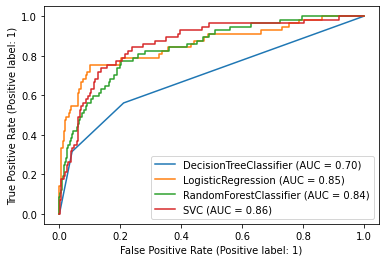

In [81]:
#PLOT THE ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(GCV_DT.best_estimator_,x_test,y_test)
plot_roc_curve(GCV_LR.best_estimator_,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GCV_RF.best_estimator_,x_test,y_test,ax=disp.ax_)
plot_roc_curve(GCV_SVC.best_estimator_,x_test,y_test,ax=disp.ax_)
plt.show()

# SUMMARY

# SVC has got the best accuracy among the rest of the classification algorithms used. So, we will go ahead with SVC.

# SAVING THE MODEL

In [82]:
#SAVING THE MODEL IN PICKLE FORMAT
#PICKELING OF A FILE OR SERIALIZATION OF A FILE
import joblib
joblib.dump(GCV_SVC.best_estimator_,"HR Analytics.pkl")

['HR Analytics.pkl']